In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.dates as mdates

In [2]:
df = pd.read_csv('dataset_SCL.csv', dtype={'Vlo-I': object, 'Vlo-O': object})
df['Vlo-I'] = df['Vlo-I'].replace('P', '', regex=True).replace('A', '', regex=True)
df['Vlo-I'] = df['Vlo-I'].astype(int)
df['Vlo-O'] = df['Vlo-O'].replace(np.nan, 0, regex=True).replace('R', '', regex=True).replace('B', '', regex=True).replace('A', '', regex=True).replace('P', '', regex=True).replace('.0', '', regex=True).replace('', 0, regex=True)
df['Vlo-O'] = df['Vlo-O'].astype(int)
df['Fecha-I'] = pd.to_datetime(df['Fecha-I'])
df['Fecha-O'] = pd.to_datetime(df['Fecha-O'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Fecha-I    68206 non-null  datetime64[ns]
 1   Vlo-I      68206 non-null  int32         
 2   Ori-I      68206 non-null  object        
 3   Des-I      68206 non-null  object        
 4   Emp-I      68206 non-null  object        
 5   Fecha-O    68206 non-null  datetime64[ns]
 6   Vlo-O      68206 non-null  int32         
 7   Ori-O      68206 non-null  object        
 8   Des-O      68206 non-null  object        
 9   Emp-O      68206 non-null  object        
 10  DIA        68206 non-null  int64         
 11  MES        68206 non-null  int64         
 12  AÑO        68206 non-null  int64         
 13  DIANOM     68206 non-null  object        
 14  TIPOVUELO  68206 non-null  object        
 15  OPERA      68206 non-null  object        
 16  SIGLAORI   68206 non-null  object       

In [4]:
df['OPERA'].value_counts().median()

358.0

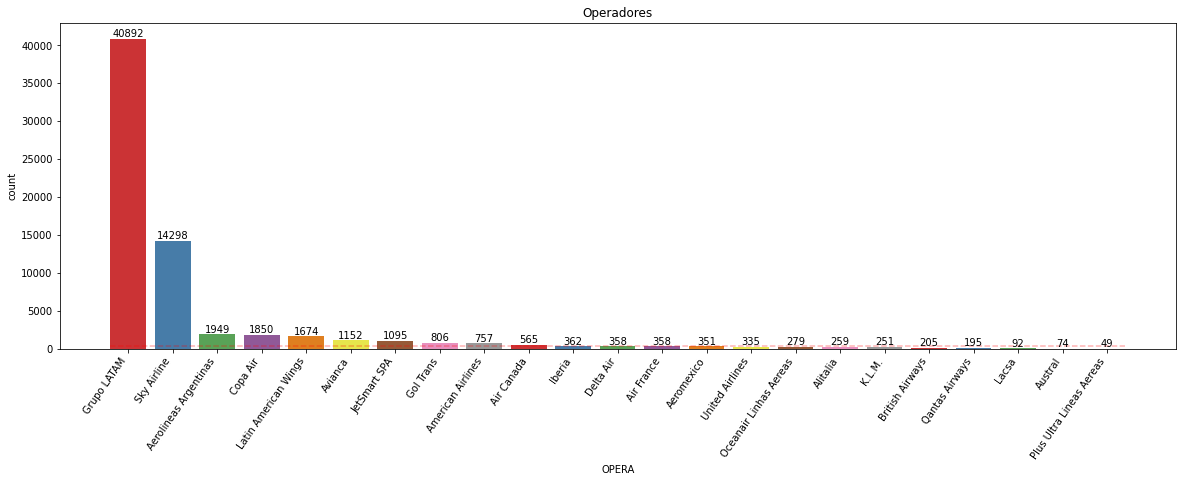

In [5]:
fig = plt.figure(figsize=(20, 6))
ax = sns.countplot(x='OPERA', data=df, palette='Set1', order=df['OPERA'].value_counts().index)
for c in ax.containers:
    labels = [f'{h}' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
plt.hlines(y=df['OPERA'].value_counts().median(), xmin=-.4, xmax=len(df['OPERA'].value_counts().index)-.6, color='red', linestyle='--', alpha=.3)
plt.xticks(rotation=55, ha='right')
plt.title('Operadores')
plt.show()

In [6]:
df_temp = pd.DataFrame(df['OPERA'].value_counts()).rename(columns={'OPERA': 'Cantidad'}).reset_index().rename(columns={'index': 'OPERA'})
otros_ope = df_temp[df_temp['Cantidad'] < df_temp['Cantidad'].median()]['OPERA'].values
df['OPERA_REF'] = df['OPERA'].replace(otros_ope, 'Otros', regex=False)

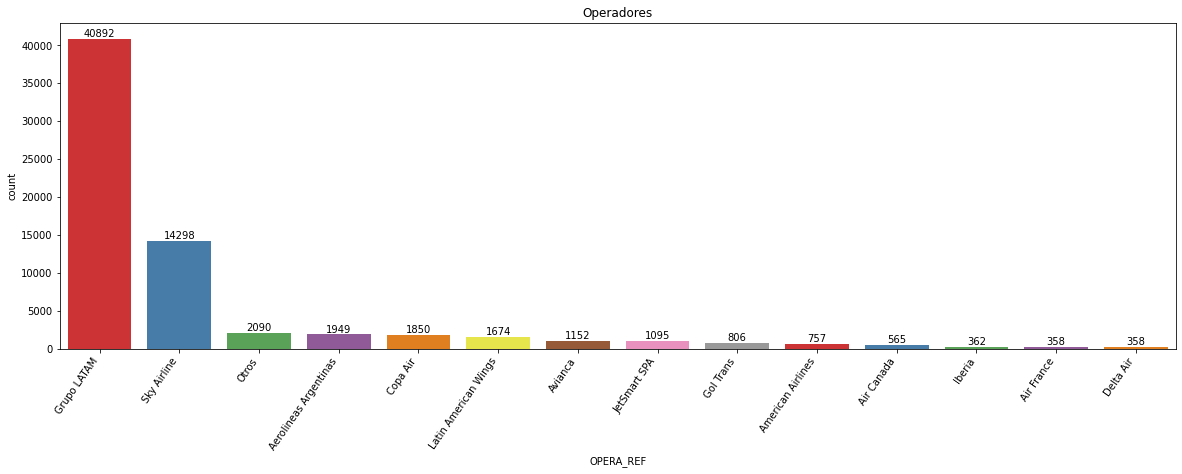

In [7]:
fig = plt.figure(figsize=(20, 6))
ax = sns.countplot(x='OPERA_REF', data=df, palette='Set1', order=df['OPERA_REF'].value_counts().index)
for c in ax.containers:
    labels = [f'{h}' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
# plt.hlines(y=df['OPERA_REF'].value_counts().mean(), xmin=-.4, xmax=len(df['OPERA_REF'].value_counts().index)-.6, color='red', linestyle='--', alpha=.3)
plt.xticks(rotation=55, ha='right')
plt.title('Operadores')
plt.show()

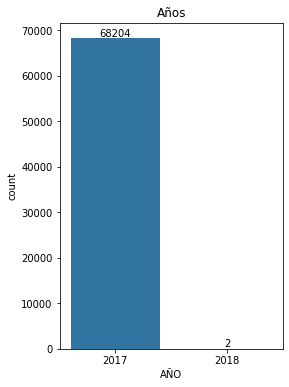

In [8]:
fig = plt.figure(figsize=(4, 6))
ax = sns.countplot(x='AÑO', data=df)

for c in ax.containers:
    labels = [f'{h}' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
    
plt.title('Años')
plt.show()

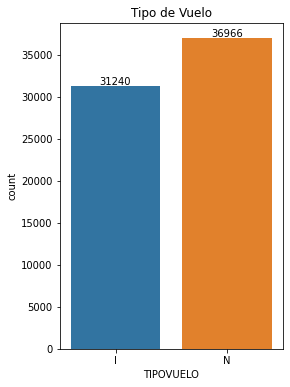

In [9]:
fig = plt.figure(figsize=(4, 6))
ax = sns.countplot(x='TIPOVUELO', data=df)

for c in ax.containers:
    labels = [f'{h}' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
    
plt.title('Tipo de Vuelo')
plt.show()

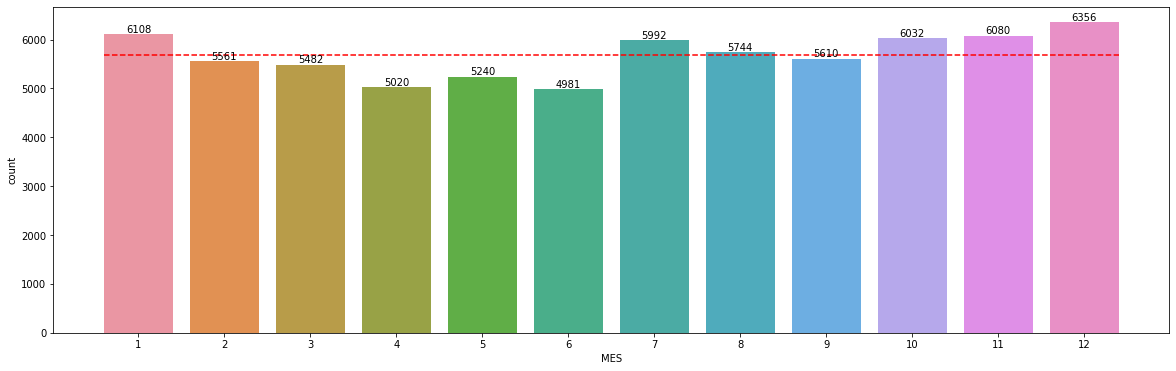

In [10]:
fig = plt.figure(figsize=(20, 6))
ax = sns.countplot(x='MES', data=df)
for c in ax.containers:
    labels = [f'{h}' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
    
plt.hlines(df['MES'].value_counts().mean(), -0.4, 11.4, color='red', linestyle='--', alpha=.3)
plt.show()

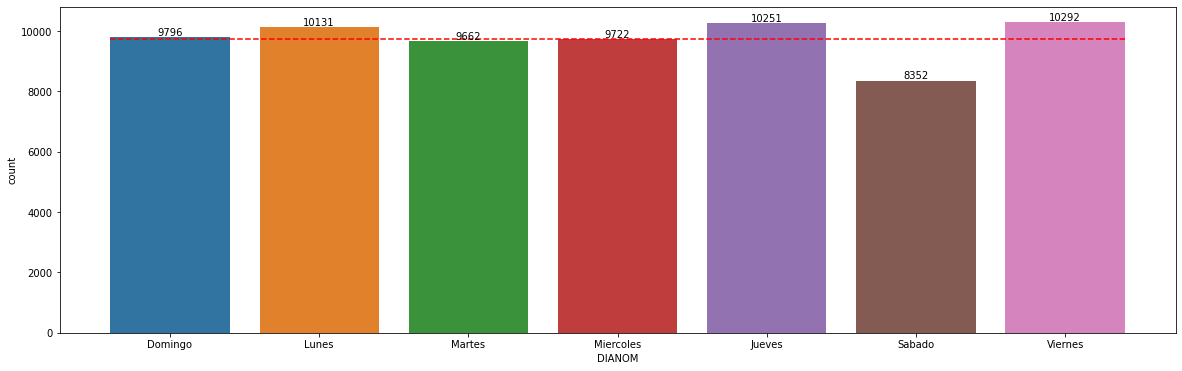

In [11]:
fig = plt.figure(figsize=(20, 6))
ax = sns.countplot(x='DIANOM', data=df)
for c in ax.containers:
    labels = [f'{h}' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
    
plt.hlines(df['DIANOM'].value_counts().mean(), -0.4, 6.4, color='red', linestyle='--', alpha=.3)
plt.show()

In [12]:
df['SIGLAORI'].value_counts()

Santiago    68206
Name: SIGLAORI, dtype: int64

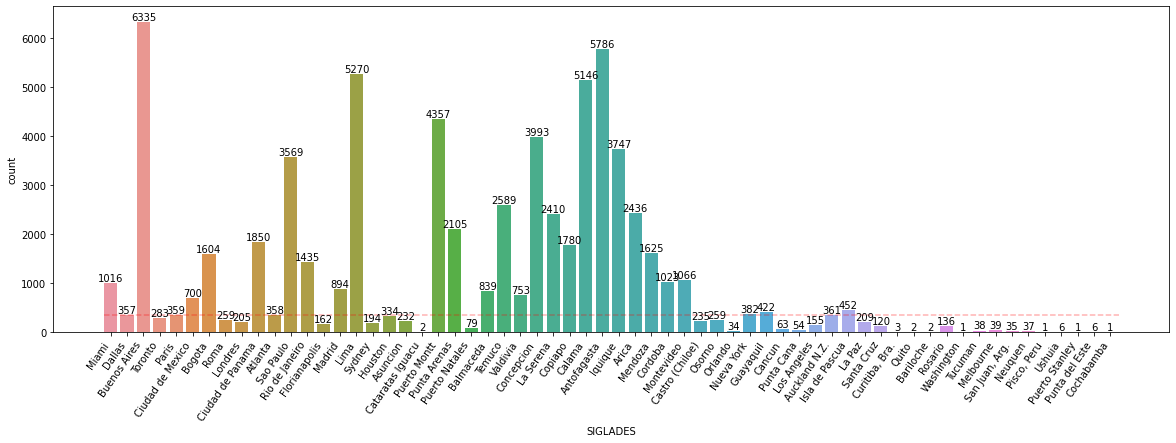

In [118]:
fig = plt.figure(figsize=(20, 6))
ax = sns.countplot(x='SIGLADES', data=df)
for c in ax.containers:
    labels = [f'{h}' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
plt.hlines(df['SIGLADES'].value_counts().median(), -0.4, df['SIGLADES'].value_counts().count()-.5, color='red', linestyle='--', alpha=.3)
plt.xticks(rotation=55, ha='right')
plt.show()

In [14]:
df_temp = pd.DataFrame(df['SIGLADES'].value_counts()).rename(columns={'SIGLADES': 'Cantidad'}).reset_index().rename(columns={'index': 'SIGLADES'})
otros_des = df_temp[df_temp['Cantidad'] < df_temp['Cantidad'].median()]['SIGLADES'].values
df['SIGLADES_REF'] = df['SIGLADES'].replace(otros_des, 'Otros', regex=False)
# df['SIGLADES_REF'] = df['SIGLADES_REF'].replace('Castro (Chiloe)', 'Otros', regex=True)

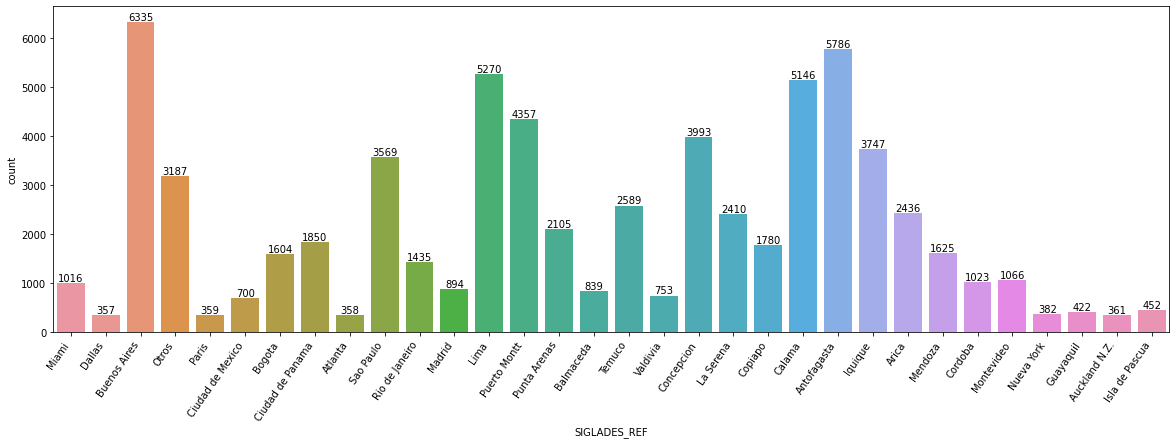

In [119]:
fig = plt.figure(figsize=(20, 6))
ax = sns.countplot(x='SIGLADES_REF', data=df)
for c in ax.containers:
    labels = [f'{h}' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
# plt.hlines(df['SIGLADES'].value_counts().mean(), -0.4, df['SIGLADES'].value_counts().count()-.5, color='red', linestyle='--')
plt.xticks(rotation=55, ha='right')
plt.show()

In [16]:
df['temporada_alta'] = 0
filter_temp_1 = ((df['Fecha-I']>'2017-12-15')&(df['Fecha-I']<'2018-03-03'))
filter_temp_2 = ((df['Fecha-I']>'2017-07-15')&(df['Fecha-I']<'2017-07-31'))
filter_temp_3 = ((df['Fecha-I']>'2017-09-11')&(df['Fecha-I']<'2017-09-30'))
df.loc[(filter_temp_1|filter_temp_2|filter_temp_3), 'temporada_alta']=1

In [17]:
df['dif_min'] = df['Fecha-O'] - df['Fecha-I']
df['dif_min_val'] = df['dif_min'].dt.total_seconds()/60
df['atraso_15'] = 0
df.loc[(df['dif_min']>timedelta(minutes=15)), 'atraso_15'] = 1

In [18]:
filter_manana = (df['Fecha-I'].dt.time>=pd.to_datetime('5:00:00').time()) & (df['Fecha-I'].dt.time<=pd.to_datetime('11:59:59').time())
filter_tarde = (df['Fecha-I'].dt.time>=pd.to_datetime('12:00:00').time()) & (df['Fecha-I'].dt.time<=pd.to_datetime('19:59:59').time())
filter_noche = ((df['Fecha-I'].dt.time>=pd.to_datetime('18:00:00').time()) & (df['Fecha-I'].dt.time<=pd.to_datetime('23:59:59').time()))|((df['Fecha-I'].dt.time>=pd.to_datetime('0:00:00').time()) & (df['Fecha-I'].dt.time<=pd.to_datetime('4:59:59').time()))
df['periodo_dia'] = ''
df.loc[filter_manana, 'periodo_dia'] = 'manana'
df.loc[filter_tarde, 'periodo_dia'] = 'tarde'
df.loc[filter_noche, 'periodo_dia'] = 'noche'

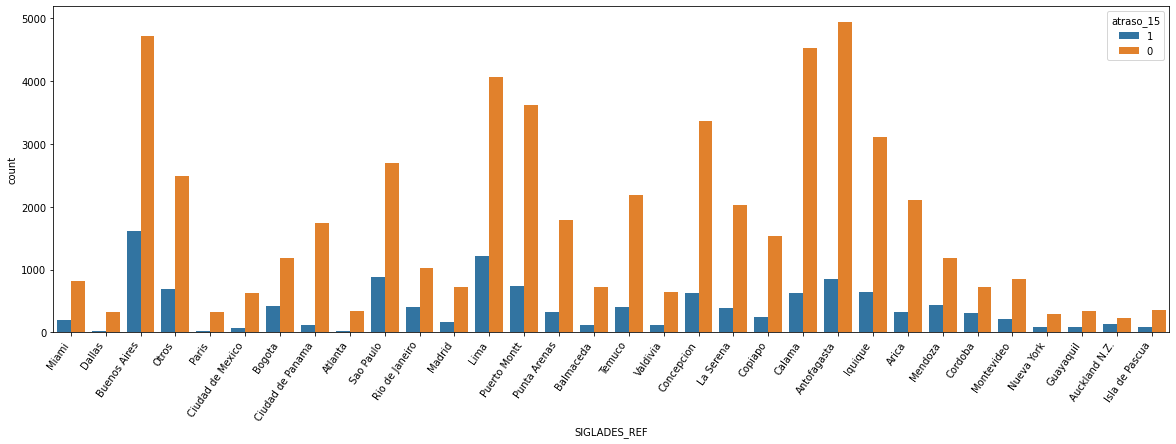

In [120]:
fig = plt.figure(figsize=(20, 6))
ax = sns.countplot(x='SIGLADES_REF', data=df, hue='atraso_15', hue_order=[1,0])
# for c in ax.containers:
#     labels = [f'{h}' if (h := v.get_height()) > 0 else '' for v in c]
#     ax.bar_label(c, labels=labels, label_type='edge')
# plt.hlines(df['SIGLADES'].value_counts().mean(), -0.4, df['SIGLADES'].value_counts().count()-.5, color='red', linestyle='--')
plt.xticks(rotation=55, ha='right')
plt.show()

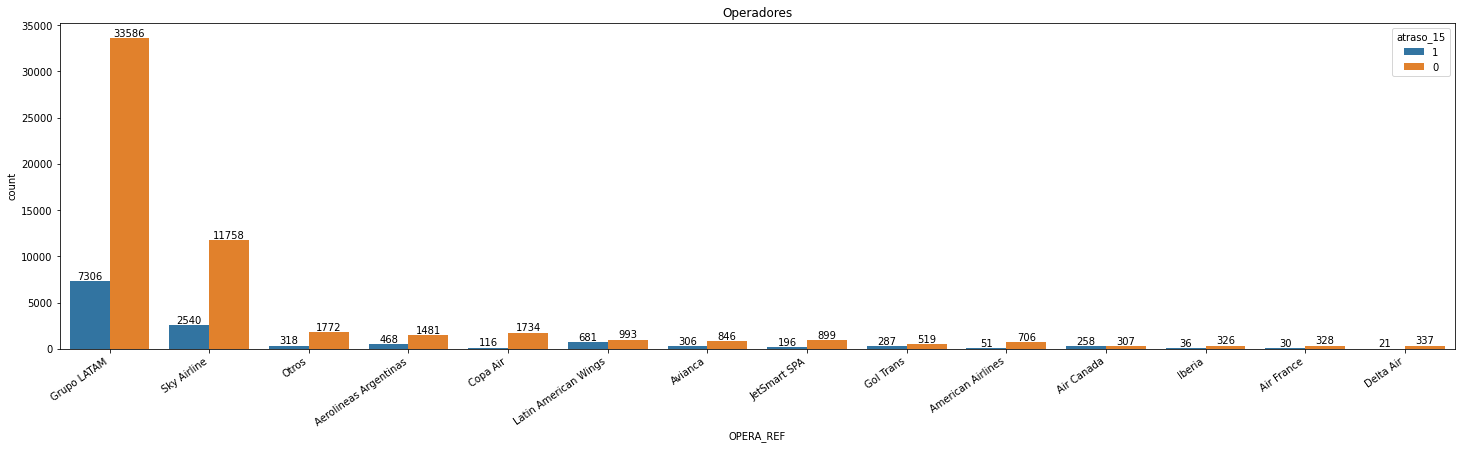

In [20]:
fig = plt.figure(figsize=(25, 6))
ax = sns.countplot(x='OPERA_REF', data=df, order=df['OPERA_REF'].value_counts().index, hue='atraso_15', hue_order=[1,0])
for c in ax.containers:
    labels = [f'{h}' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
plt.xticks(rotation=35, ha='right')
plt.title('Operadores')
plt.show()

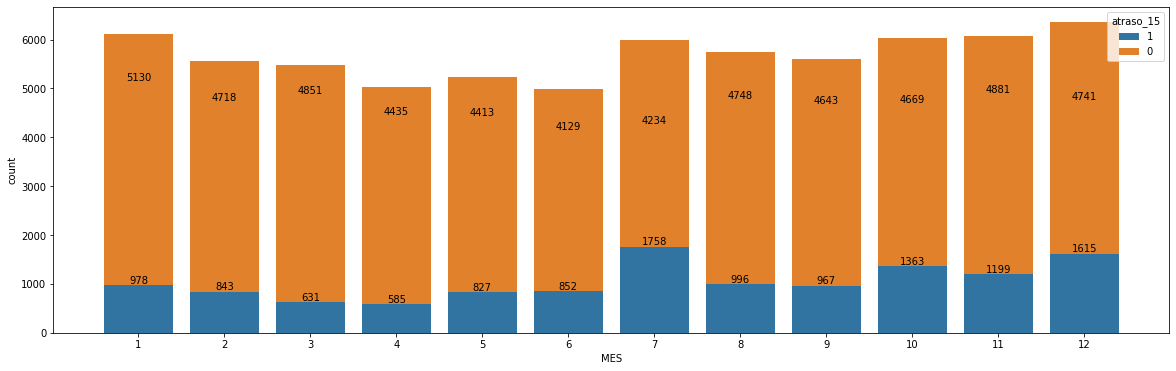

In [21]:
fig = plt.figure(figsize=(20, 6))
ax = sns.countplot(x='MES', data=df, hue='atraso_15', dodge=False, hue_order=[1,0])
bottoms = {}
for c in ax.containers:
    labels = [f'{h}' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
    for bar in c:
        x, y = bar.get_xy()
        h = bar.get_height()
        if x in bottoms:
            bar.set_y(bottoms[x])
            bottoms[x] += h
        else:
            bottoms[x] = h
ax.relim()
ax.autoscale()
    
# plt.hlines(df['MES'].value_counts().mean(), -0.4, 11.4, color='red', linestyle='--')
plt.show()

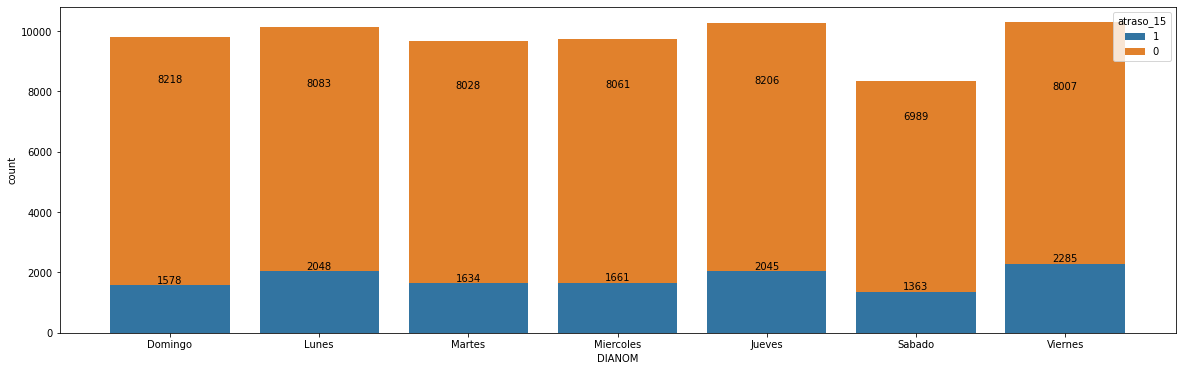

In [22]:
fig = plt.figure(figsize=(20, 6))
ax = sns.countplot(x='DIANOM', data=df, hue='atraso_15', dodge=False, hue_order=[1,0])
bottoms = {}
for c in ax.containers:
    labels = [f'{h}' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
    for bar in c:
        x, y = bar.get_xy()
        h = bar.get_height()
        if x in bottoms:
            bar.set_y(bottoms[x])
            bottoms[x] += h
        else:
            bottoms[x] = h
ax.relim()
ax.autoscale()
# plt.hlines(df['DIANOM'].value_counts().mean(), -0.4, 6.4, color='red', linestyle='--')
plt.show()

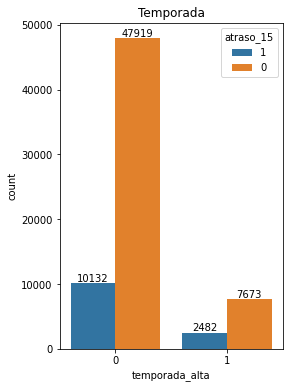

In [121]:
fig = plt.figure(figsize=(4, 6))
ax = sns.countplot(x='temporada_alta', data=df, hue='atraso_15', hue_order=[1,0])

for c in ax.containers:
    labels = [f'{h}' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
    
plt.title('Temporada')
plt.show()

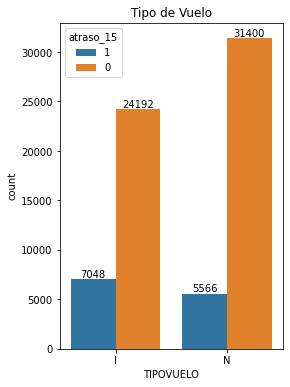

In [122]:
fig = plt.figure(figsize=(4, 6))
ax = sns.countplot(x='TIPOVUELO', data=df, hue='atraso_15', hue_order=[1,0])

for c in ax.containers:
    labels = [f'{h}' if (h := v.get_height()) > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')
    
plt.title('Tipo de Vuelo')
plt.show()

In [25]:
df_temp = pd.DataFrame(df[df['atraso_15']==1]['Fecha-I'].groupby(df['Fecha-I'].dt.date).count()).rename(columns={'Fecha-I':'count'}).reset_index()

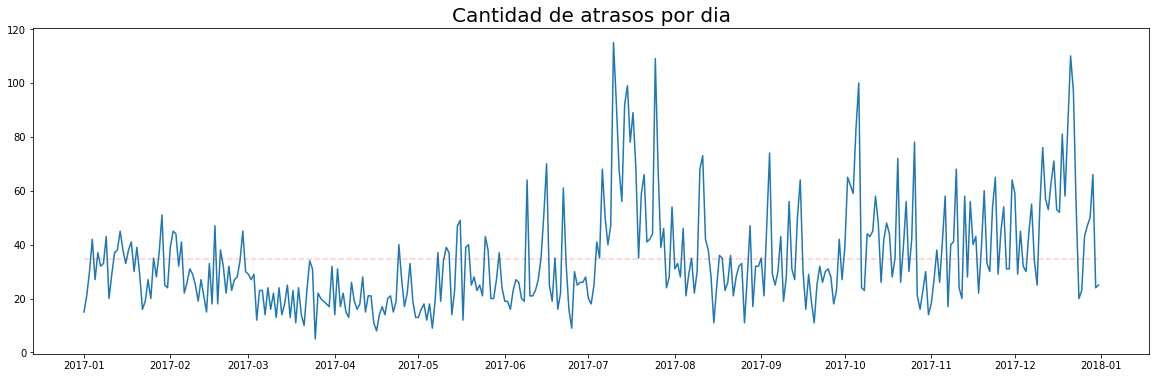

In [26]:
fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(1, 1, 1)
plt.plot(df_temp['Fecha-I'], df_temp['count'])
plt.hlines(df_temp['count'].mean(), df_temp['Fecha-I'].min(), df_temp['Fecha-I'].max(), color='red', linestyle='--', label='Promedio', alpha=0.2)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.title('Cantidad de atrasos por dia', fontsize=20)
plt.show()

In [41]:
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,OPERA,SIGLAORI,SIGLADES,OPERA_REF,SIGLADES_REF,temporada_alta,dif_min,atraso_15,periodo_dia,dif_min_val
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,American Airlines,Santiago,Miami,American Airlines,Miami,0,0 days 00:03:00,0,noche,3.0
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,American Airlines,Santiago,Miami,American Airlines,Miami,0,0 days 00:09:00,0,noche,9.0
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,American Airlines,Santiago,Miami,American Airlines,Miami,0,0 days 00:09:00,0,noche,9.0
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,American Airlines,Santiago,Miami,American Airlines,Miami,0,0 days 00:03:00,0,noche,3.0
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,American Airlines,Santiago,Miami,American Airlines,Miami,0,-1 days +23:58:00,0,noche,-2.0


In [44]:
df.columns

Index(['Fecha-I', 'Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O',
       'Ori-O', 'Des-O', 'Emp-O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLAORI', 'SIGLADES', 'OPERA_REF', 'SIGLADES_REF',
       'temporada_alta', 'dif_min', 'atraso_15', 'periodo_dia', 'dif_min_val'],
      dtype='object')

In [126]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

import lightgbm as lgb

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

In [96]:
df_to_ml = pd.get_dummies(df[['DIA', 'MES', 'DIANOM', 'TIPOVUELO', 'OPERA_REF', 'SIGLADES_REF','temporada_alta', 'periodo_dia', 'dif_min_val']], drop_first=False)

In [103]:
X, y = df_to_ml.values, df['atraso_15']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [127]:
X_train, X_test, y_train, y_test = train_test_split(df_to_ml, df['atraso_15'], test_size=0.33, random_state=42, stratify=df['atraso_15'])

clf = RandomForestClassifier(n_estimators=100, max_depth=10)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_pred, y_test))

1.0


In [128]:
print(confusion_matrix(y_pred, y_test))

[[18345     0]
 [    0  4163]]


In [129]:
roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

1.0

In [130]:
gbm = lgb.LGBMClassifier(n_estimators=200,)
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='l1',
        early_stopping_rounds=5)

[1]	valid_0's l1: 0.26933	valid_0's binary_logloss: 0.384259
[2]	valid_0's l1: 0.241969	valid_0's binary_logloss: 0.32372
[3]	valid_0's l1: 0.217861	valid_0's binary_logloss: 0.278391
[4]	valid_0's l1: 0.196393	valid_0's binary_logloss: 0.242269
[5]	valid_0's l1: 0.177178	valid_0's binary_logloss: 0.21249
[6]	valid_0's l1: 0.159929	valid_0's binary_logloss: 0.187414
[7]	valid_0's l1: 0.144419	valid_0's binary_logloss: 0.165989
[8]	valid_0's l1: 0.130453	valid_0's binary_logloss: 0.147492
[9]	valid_0's l1: 0.117867	valid_0's binary_logloss: 0.131396
[10]	valid_0's l1: 0.106516	valid_0's binary_logloss: 0.117304
[11]	valid_0's l1: 0.0962744	valid_0's binary_logloss: 0.104906
[12]	valid_0's l1: 0.0870296	valid_0's binary_logloss: 0.093956
[13]	valid_0's l1: 0.0786817	valid_0's binary_logloss: 0.0842535
[14]	valid_0's l1: 0.0711416	valid_0's binary_logloss: 0.0756331
[15]	valid_0's l1: 0.0643296	valid_0's binary_logloss: 0.0679568
[16]	valid_0's l1: 0.0581742	valid_0's binary_logloss: 0.06

c:\Users\lanze\Envs\lata_chall\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


LGBMClassifier(n_estimators=200)

In [131]:
params = {'boosting_type': 'gbdt',
          'max_depth' : -1,
          'objective': 'binary',
          'nthread': 3,
          'num_leaves': 64,
          'learning_rate': 0.05,
          'max_bin': 512,
          'subsample_for_bin': 200,
          'subsample': 1,
          'subsample_freq': 1,
          'colsample_bytree': 0.8,
          'reg_alpha': 5,
          'reg_lambda': 10,
          'min_split_gain': 0.5,
          'min_child_weight': 1,
          'min_child_samples': 5,
          'scale_pos_weight': 1,
          'num_class' : 1,
          'metric' : 'binary_error'}

# Create parameters to search
gridParams = {
    'learning_rate': [0.5, 0.005],
    'n_estimators': [40, 200, 1000],
    'num_leaves': [5, 10, 15],
    'boosting_type' : ['gbdt'],
    'objective' : ['binary'],
    'random_state' : [501], 
    'colsample_bytree' : [0.66],
    'subsample' : [0.75],
    'reg_alpha' : [1,1.2],
    'reg_lambda' : [1,1.4],
    }

# Create classifier to use
mdl = lgb.LGBMClassifier(boosting_type= 'gbdt',
          objective = 'auc',
          n_jobs = 3, 
          silent = True,
          max_depth = params['max_depth'],
          max_bin = params['max_bin'],
          subsample_for_bin = params['subsample_for_bin'],
          subsample = params['subsample'],
          subsample_freq = params['subsample_freq'],
          min_split_gain = params['min_split_gain'],
          min_child_weight = params['min_child_weight'],
          min_child_samples = params['min_child_samples'],
          scale_pos_weight = params['scale_pos_weight'])

In [132]:
grid = GridSearchCV(mdl, gridParams,
                    verbose=3,
                    cv=4,
                    n_jobs=2)
# Run the grid
grid.fit(df_to_ml, df['atraso_15'])

Fitting 4 folds for each of 72 candidates, totalling 288 fits


c:\Users\lanze\Envs\lata_chall\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


GridSearchCV(cv=4,
             estimator=LGBMClassifier(max_bin=512, min_child_samples=5,
                                      min_child_weight=1, min_split_gain=0.5,
                                      n_jobs=3, objective='auc',
                                      scale_pos_weight=1, silent=True,
                                      subsample=1, subsample_for_bin=200,
                                      subsample_freq=1),
             n_jobs=2,
             param_grid={'boosting_type': ['gbdt'], 'colsample_bytree': [0.66],
                         'learning_rate': [0.5, 0.005],
                         'n_estimators': [40, 200, 1000],
                         'num_leaves': [5, 10, 15], 'objective': ['binary'],
                         'random_state': [501], 'reg_alpha': [1, 1.2],
                         'reg_lambda': [1, 1.4], 'subsample': [0.75]},
             verbose=3)

In [133]:
grid.best_params_

{'boosting_type': 'gbdt',
 'colsample_bytree': 0.66,
 'learning_rate': 0.005,
 'n_estimators': 200,
 'num_leaves': 5,
 'objective': 'binary',
 'random_state': 501,
 'reg_alpha': 1,
 'reg_lambda': 1,
 'subsample': 0.75}

In [134]:
gbm = lgb.LGBMClassifier(**grid.best_params_)
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='l1',
        early_stopping_rounds=5)

c:\Users\lanze\Envs\lata_chall\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's l1: 0.299968	valid_0's binary_logloss: 0.473843
[2]	valid_0's l1: 0.298464	valid_0's binary_logloss: 0.468973
[3]	valid_0's l1: 0.298423	valid_0's binary_logloss: 0.468854
[4]	valid_0's l1: 0.296928	valid_0's binary_logloss: 0.464095
[5]	valid_0's l1: 0.296887	valid_0's binary_logloss: 0.463978
[6]	valid_0's l1: 0.295399	valid_0's binary_logloss: 0.459326
[7]	valid_0's l1: 0.293919	valid_0's binary_logloss: 0.454772
[8]	valid_0's l1: 0.292446	valid_0's binary_logloss: 0.450313
[9]	valid_0's l1: 0.290981	valid_0's binary_logloss: 0.445946
[10]	valid_0's l1: 0.290943	valid_0's binary_logloss: 0.445841
[11]	valid_0's l1: 0.289485	valid_0's binary_logloss: 0.441563
[12]	valid_0's l1: 0.288035	valid_0's binary_logloss: 0.437369
[13]	valid_0's l1: 0.286593	valid_0's binary_logloss: 0.433255
[14]	valid_0's l1: 0.285158	valid_0's binary_logloss: 0.429219
[15]	valid_0's l1: 0.28373	valid_0's binary_logloss: 0.425258
[16]	valid_0's l1: 0.28231	valid_0's binary_logloss: 0.421368
[17

LGBMClassifier(colsample_bytree=0.66, learning_rate=0.005, n_estimators=200,
               num_leaves=5, objective='binary', random_state=501, reg_alpha=1,
               reg_lambda=1, subsample=0.75)

In [135]:
gbm = lgb.LGBMClassifier(**grid.best_params_)
gbm.fit(df_to_ml, df['atraso_15'])

LGBMClassifier(colsample_bytree=0.66, learning_rate=0.005, n_estimators=200,
               num_leaves=5, objective='binary', random_state=501, reg_alpha=1,
               reg_lambda=1, subsample=0.75)

In [136]:
roc_auc_score(y_test, gbm.predict_proba(X_test)[:, 1])

1.0